In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
# Load the dataset
data = pd.read_csv('/content/MarketPricePrediction.csv')


In [3]:
# Handle missing values by forward filling
data.fillna(method='ffill', inplace=True)

In [4]:
# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

<ipython-input-4-85ec55d0cbce>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'])


In [5]:
# Use only the 'priceMod' column for this example
data = data[['priceMod']]

In [6]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [7]:
# Prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [8]:
# Set time_step to 12 for monthly data
time_step = 12
X, Y = create_dataset(data_scaled, time_step)

In [9]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

In [10]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [11]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
# Train the model
model.fit(X_train, Y_train, batch_size=1, epochs=20)

Epoch 1/20
8171/8171 [==============================] - 78s 9ms/step - loss: 0.0140
Epoch 2/20
8171/8171 [==============================] - 72s 9ms/step - loss: 0.0123
Epoch 3/20
8171/8171 [==============================] - 72s 9ms/step - loss: 0.0115
Epoch 4/20
8171/8171 [==============================] - 73s 9ms/step - loss: 0.0108
Epoch 5/20
8171/8171 [==============================] - 72s 9ms/step - loss: 0.0102
Epoch 6/20
8171/8171 [==============================] - 71s 9ms/step - loss: 0.0095
Epoch 7/20
8171/8171 [==============================] - 72s 9ms/step - loss: 0.0087
Epoch 8/20
8171/8171 [==============================] - 70s 9ms/step - loss: 0.0081
Epoch 9/20
8171/8171 [==============================] - 72s 9ms/step - loss: 0.0077
Epoch 10/20
8171/8171 [==============================] - 71s 9ms/step - loss: 0.0072
Epoch 11/20
8171/8171 [==============================] - 72s 9ms/step - loss: 0.0069
Epoch 12/20
8171/8171 [==============================] - 71s 9ms/step - lo

In [14]:
#Take predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

64/64 [==============================] - 0s 5ms/step


In [15]:
#Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [16]:
#Inverse transform the actual values
Y_train = scaler.inverse_transform([Y_train])
Y_test = scaler.inverse_transform([Y_test])

In [17]:
#Calculate evaluation metrics
train_mae = mean_absolute_error(Y_train[0], train_predict[:, 0])
train_mse = mean_squared_error(Y_train[0], train_predict[:, 0])
train_rmse = np.sqrt(train_mse)

In [18]:
test_mae = mean_absolute_error(Y_test[0], test_predict[:, 0])
test_mse = mean_squared_error(Y_test[0], test_predict[:, 0])
test_rmse = np.sqrt(test_mse)

In [19]:
print(f'Train Mean Absolute Error (MAE): {train_mae}')
print(f'Train Mean Squared Error (MSE): {train_mse}')
print(f'Train Root Mean Squared Error (RMSE): {train_rmse}')

Train Mean Absolute Error (MAE): 280.2634266739069
Train Mean Squared Error (MSE): 176642.79417597526
Train Root Mean Squared Error (RMSE): 420.28894129631254


In [20]:
print(f'Test Mean Absolute Error (MAE): {test_mae}')
print(f'Test Mean Squared Error (MSE): {test_mse}')
print(f'Test Root Mean Squared Error (RMSE): {test_rmse}')

Test Mean Absolute Error (MAE): 370.41211080061004
Test Mean Squared Error (MSE): 355354.5160896529
Test Root Mean Squared Error (RMSE): 596.116193446926


In [21]:
# Install the Prophet library
!pip install prophet

In [22]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [23]:
# Load the dataset
data = pd.read_csv('/content/MarketPricePrediction.csv')


In [24]:
# Handle missing values by forward filling
data.fillna(method='ffill', inplace=True)

In [25]:
# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

<ipython-input-25-9a6c03a63562>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'])


In [26]:
# Create a new dataframe for Prophet with 'ds' and 'y' columns
data_prophet = data[['date', 'priceMod']].rename(columns={'date': 'ds', 'priceMod': 'y'})

In [27]:
# Display the first few rows of the dataset
print(data_prophet.head())

          ds     y
0 2005-01-01   446
1 2006-01-01   563
2 2010-01-01  1460
3 2011-01-01  3433
4 2012-01-01   605


In [28]:
# Initialize the Prophet model
model = Prophet()

In [29]:
# Fit the model to the data
model.fit(data_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr5t5wr2l/opwv422t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr5t5wr2l/mtw_77ja.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13966', 'data', 'file=/tmp/tmpr5t5wr2l/opwv422t.json', 'init=/tmp/tmpr5t5wr2l/mtw_77ja.json', 'output', 'file=/tmp/tmpr5t5wr2l/prophet_modelunh24a4a/prophet_model-20240520181919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:19:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:19:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [30]:
# Create a dataframe with future dates for 12 months
future_dates = model.make_future_dataframe(periods=12, freq='M')

In [31]:
# Make predictions
forecast = model.predict(future_dates)

In [32]:
# Display the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

            ds         yhat   yhat_lower   yhat_upper
249 2016-09-30  2208.079167  1475.526868  2929.226189
250 2016-10-31  1898.563527  1200.710859  2624.697051
251 2016-11-30  1800.796448  1071.056862  2581.430218
252 2016-12-31  1814.983625  1092.889191  2552.212684
253 2017-01-31  1700.765286  1026.864746  2433.150283


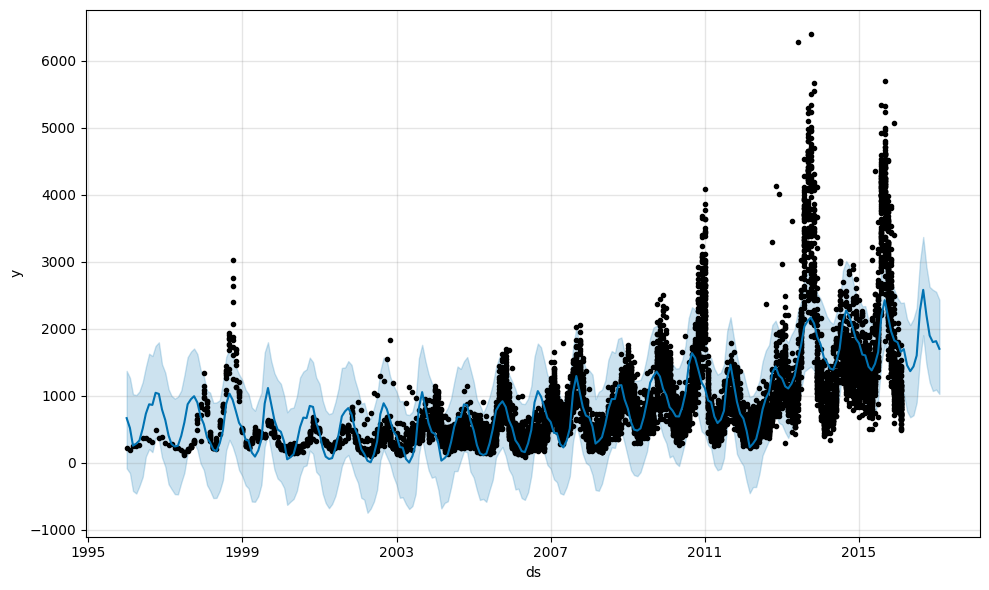

In [33]:
# Plot the forecast
fig = model.plot(forecast)
fig.show()

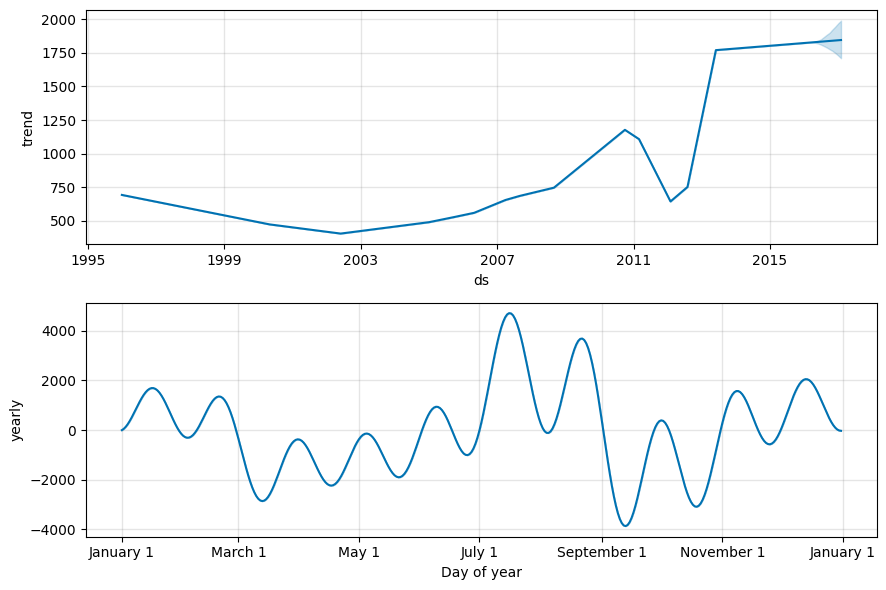

In [34]:
# Plot the forecast components
fig2 = model.plot_components(forecast)
fig2.show()

In [35]:
# Identify the start date for the test period based on the available data
test_start_date = data_prophet['ds'].max() - pd.DateOffset(months=11)
test_start_date = test_start_date.strftime('%Y-%m-%d')

In [36]:
# Extract the forecasted values for the test period
test_data = data_prophet[data_prophet['ds'] >= test_start_date]
forecast_test = forecast[forecast['ds'] >= test_start_date]

In [37]:
# Align test data and forecasted data
aligned_test_data = test_data.set_index('ds').join(forecast.set_index('ds')[['yhat']], how='inner')

In [38]:
# Calculate evaluation metrics
mae = mean_absolute_error(aligned_test_data['y'], aligned_test_data['yhat'])
mse = mean_squared_error(aligned_test_data['y'], aligned_test_data['yhat'])
rmse = np.sqrt(mse)

In [39]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 656.6961379702025
Mean Squared Error (MSE): 771927.9077440283
Root Mean Squared Error (RMSE): 878.5942793713309
